# Series temporales multivariables

From https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen

Los datos fueron obtenidos del dataset de Irvine: https://archive.ics.uci.edu/ml/datasets/Air+Quality

In [3]:
df = pd.read_csv("datasets/AirQualityUCI.csv", delimiter=";", parse_dates=[['Date', 'Time']], dayfirst=False, decimal=",")

df.dtypes

Date_Time         object
CO(GT)           float64
PT08.S1(CO)        int64
NMHC(GT)           int64
C6H6(GT)         float64
PT08.S2(NMHC)      int64
NOx(GT)            int64
PT08.S3(NOx)       int64
NO2(GT)            int64
PT08.S4(NO2)       int64
PT08.S5(O3)        int64
T                float64
RH               float64
AH               float64
dtype: object

In [4]:
less datasets/AirQualityUCI.csv

In [5]:
df.Date_Time.head(), df.Date_Time.tail()

(0    10/03/2004 18.00.00
 1    10/03/2004 19.00.00
 2    10/03/2004 20.00.00
 3    10/03/2004 21.00.00
 4    10/03/2004 22.00.00
 Name: Date_Time, dtype: object, 9352    04/04/2005 10.00.00
 9353    04/04/2005 11.00.00
 9354    04/04/2005 12.00.00
 9355    04/04/2005 13.00.00
 9356    04/04/2005 14.00.00
 Name: Date_Time, dtype: object)

In [6]:
df['Date_Time'] = pd.to_datetime(df.Date_Time , format = '%d/%m/%Y %H.%M.%S')
data = df.drop(['Date_Time'], axis=1)
data.index = df.Date_Time

In [7]:
data = data.fillna(method="pad")

In [8]:
#creating the train and validation set
train = data[:int(0.8*(len(data)))]
valid = data[int(0.8*(len(data))):]

#fit the model
model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid));

/Users/mlmarenchino/.virtualenv/timeseries/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [9]:
#converting predictions to dataframe
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[data.columns])
for j in range(0,13):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

# #check rmse
# for i in data.columns:
#     print('rmse value for', i, 'is : ', math.sqrt(mean_squared_error(pred[i], valid[i])))

In [10]:
#make final predictions
model = VAR(endog=data)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=10)
print(yhat)

[[ 4.83828788e+00  1.07761794e+03 -2.02755723e+02  1.10508004e+01
   1.04519077e+03  2.60751060e+02  6.48193186e+02  1.49439100e+02
   1.15109492e+03  8.46002947e+02  2.60663362e+01  1.44756501e+01
  -6.35797675e-01]
 [ 3.30636077e+00  1.08104754e+03 -2.05129401e+02  1.01439190e+01
   1.03968472e+03  2.62957005e+02  6.45343049e+02  1.39264979e+02
   1.16652413e+03  8.71742594e+02  2.38598579e+01  1.57539396e+01
  -1.66450972e+00]
 [ 4.85802292e-01  1.08227150e+03 -2.07208713e+02  9.21327793e+00
   1.03193650e+03  2.66702737e+02  6.44254715e+02  1.32791686e+02
   1.17713167e+03  8.93663638e+02  2.18523988e+01  1.69270241e+01
  -2.60234905e+00]
 [-2.52598956e+00  1.08195564e+03 -2.09026997e+02  8.28610001e+00
   1.02287769e+03  2.70165822e+02  6.44345462e+02  1.28050248e+02
   1.18426254e+03  9.12166541e+02  2.00239882e+01  1.80006086e+01
  -3.45986566e+00]
 [-5.34240142e+00  1.08056815e+03 -2.10599735e+02  7.38199886e+00
   1.01312336e+03  2.72767477e+02  6.45293969e+02  1.24197378e+02


/Users/mlmarenchino/.virtualenv/timeseries/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [11]:
data

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date_Time,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
2004-03-10 23:00:00,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848
2004-03-11 00:00:00,1.2,1185,31,3.6,690,62,1462,77,1333,733,11.3,56.8,0.7603
2004-03-11 01:00:00,1.0,1136,31,3.3,672,62,1453,76,1333,730,10.7,60.0,0.7702
2004-03-11 02:00:00,0.9,1094,24,2.3,609,45,1579,60,1276,620,10.7,59.7,0.7648


In [12]:
y_T = data["T"]
yhat_T = [elem[10] for elem in yhat]
yhat_T

[26.06633615833825,
 23.85985785681627,
 21.852398781827123,
 20.02398821811081,
 18.358328464679065,
 16.841095783231292,
 15.459317166758966,
 14.201137699468209,
 13.055717579429118,
 12.013164670019895]

In [13]:
index = pd.date_range('2005-04-04 15:00:00', periods=10, freq='H')
yhat_T = pd.Series(yhat_T, index=index)
yhat_T

2005-04-04 15:00:00    26.066336
2005-04-04 16:00:00    23.859858
2005-04-04 17:00:00    21.852399
2005-04-04 18:00:00    20.023988
2005-04-04 19:00:00    18.358328
2005-04-04 20:00:00    16.841096
2005-04-04 21:00:00    15.459317
2005-04-04 22:00:00    14.201138
2005-04-04 23:00:00    13.055718
2005-04-05 00:00:00    12.013165
Freq: H, dtype: float64

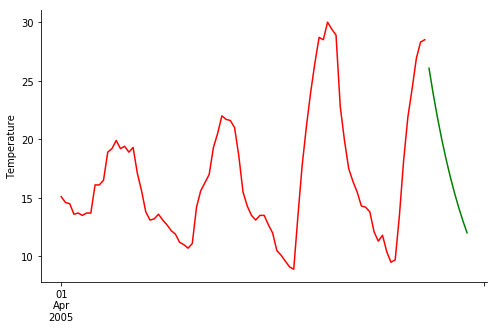

In [14]:
fig, ax= plt.subplots(figsize=(8,5))
# y_T.append(yhat_T)['2005-04'].plot(color="red")
y_T['2005-04'].plot(color="red")
yhat_T.plot(color="green")
ax.set_xlabel('')
ax.set_ylabel('Temperature')
ax.set_xticks([], minor=True) # I prefer to remove the minor ticks for a cleaner plot
sns.despine()
plt.show()

In [15]:
pd.DataFrame(model_fit.coefs[0,:,:])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.681850,-0.003134,0.004922,1.419360,-0.039718,-0.014681,0.008669,0.199539,-0.002575,-0.002463,0.418366,0.263686,-2.032946
1,-0.016494,0.994410,-0.007171,-7.492803,0.195726,0.026582,0.024184,-0.009062,-0.016083,-0.049982,0.236084,0.285683,6.160802
2,0.009915,0.042262,0.922676,-2.947508,0.081688,-0.001304,0.024161,-0.000748,0.013922,-0.020119,-0.789115,-0.173337,3.299857
3,0.000485,0.003175,-0.000636,0.272113,0.016048,0.001407,0.001009,-0.002009,0.000591,-0.002517,-0.033278,0.006148,0.635203
4,-0.036925,0.099210,-0.022118,-13.399052,1.254875,0.069718,0.041980,-0.048226,-0.004787,-0.069395,0.250590,0.165756,11.434887
5,0.398679,0.048234,-0.025005,1.406666,0.046341,0.893943,-0.004886,-0.285146,-0.057279,-0.026394,-0.452649,0.137692,-1.131398
6,0.064069,-0.091179,0.034266,0.238157,0.005364,-0.037655,0.897747,-0.024302,0.034130,0.036691,-1.663046,-0.453078,2.447185
7,0.325525,0.032070,-0.001543,1.164969,-0.038397,0.043191,-0.009382,0.583687,-0.002250,-0.003019,-0.853349,-0.555289,0.473765
8,-0.017258,0.095738,-0.012929,-18.567376,0.484088,0.042308,0.074580,-0.034833,0.921315,-0.062901,1.647762,0.716654,13.670031
9,-0.022203,0.129442,-0.033966,-7.575315,0.302688,0.078673,0.007581,-0.065101,0.007565,0.750338,-1.773517,0.258421,8.096354


Si fuera con una sola variable...

In [16]:
from statsmodels.tsa.ar_model import AR

In [17]:
data["T"]

Date_Time
2004-03-10 18:00:00    13.6
2004-03-10 19:00:00    13.3
2004-03-10 20:00:00    11.9
2004-03-10 21:00:00    11.0
2004-03-10 22:00:00    11.2
2004-03-10 23:00:00    11.2
2004-03-11 00:00:00    11.3
2004-03-11 01:00:00    10.7
2004-03-11 02:00:00    10.7
2004-03-11 03:00:00    10.3
2004-03-11 04:00:00    10.1
2004-03-11 05:00:00    11.0
2004-03-11 06:00:00    10.5
2004-03-11 07:00:00    10.2
2004-03-11 08:00:00    10.8
2004-03-11 09:00:00    10.5
2004-03-11 10:00:00    10.8
2004-03-11 11:00:00    10.5
2004-03-11 12:00:00     9.5
2004-03-11 13:00:00     8.3
2004-03-11 14:00:00     8.0
2004-03-11 15:00:00     8.3
2004-03-11 16:00:00     9.7
2004-03-11 17:00:00     9.8
2004-03-11 18:00:00    10.3
2004-03-11 19:00:00     9.7
2004-03-11 20:00:00     9.6
2004-03-11 21:00:00     9.1
2004-03-11 22:00:00     8.2
2004-03-11 23:00:00     8.2
                       ... 
2005-04-03 09:00:00    17.8
2005-04-03 10:00:00    21.1
2005-04-03 11:00:00    24.0
2005-04-03 12:00:00    26.5
2005-04-03

In [18]:
#make final predictions
model = AR(endog=data["T"])
model_fit = model.fit()
yhat = model_fit.predict(start=data.index[-1] + pd.Timedelta(hours=1), end=data.index[-1] + pd.Timedelta(hours=10))
print(yhat)

2005-04-04 15:00:00    27.734533
2005-04-04 16:00:00    27.013780
2005-04-04 17:00:00    26.229679
2005-04-04 18:00:00    25.602975
2005-04-04 19:00:00    25.086500
2005-04-04 20:00:00    24.645488
2005-04-04 21:00:00    24.198788
2005-04-04 22:00:00    23.574498
2005-04-04 23:00:00    22.942584
2005-04-05 00:00:00    22.378095
Freq: H, dtype: float64


/Users/mlmarenchino/.virtualenv/timeseries/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


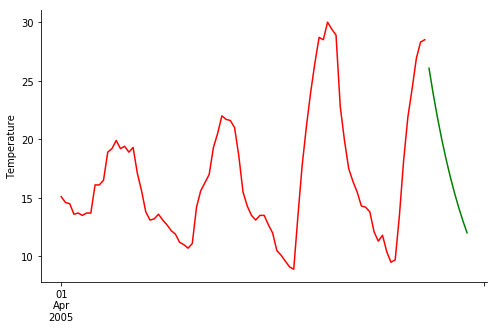

In [19]:
fig, ax= plt.subplots(figsize=(8,5))
# y_T.append(yhat_T)['2005-04'].plot(color="red")
y_T['2005-04'].plot(color="red")
yhat_T.plot(color="green")
ax.set_xlabel('')
ax.set_ylabel('Temperature')
ax.set_xticks([], minor=True) # I prefer to remove the minor ticks for a cleaner plot
sns.despine()
plt.show()

Comparando ambas predicciones...

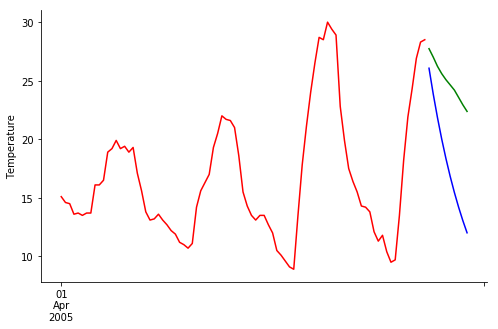

In [20]:
fig, ax= plt.subplots(figsize=(8,5))
# y_T.append(yhat)['2005-04'].plot(color="red")
y_T['2005-04'].plot(color="red")
yhat.plot(color="green")
yhat_T.plot(color="blue")
ax.set_xlabel('')
ax.set_ylabel('Temperature')
ax.set_xticks([], minor=True) # I prefer to remove the minor ticks for a cleaner plot
sns.despine()
plt.show()